In [41]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [42]:
np.random.seed(5151)
merged_df = pd.read_csv('./processed_data/merged_df.csv')
merged_df = merged_df.drop(columns=['Unnamed: 0'])
print(merged_df.head())

         Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0  2017-11-30       1       W          19         2        7.284728   
1  2017-11-30       1       W          19         3        6.852436   
2  2017-11-30       1       W          19         4        7.267784   
3  2017-11-30       1       W          19         6        6.338894   
4  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  AcuteLoad  ChronicLoad  AcuteChronicRatio  \
0               4.423615     206.57       371.20               0.56   
1               4.888893     407.86       454.67               0.90   
2               5.694449     236.00       406.90               0.58   
3               4.777782     297.29       415.87               0.71   
4               4.091273     237.57       476.60               0.50   

   MonitoringScore      Pain   Illness  Nutrition  wellness  
0         0.981035 -0.364611 -0.301008  -1.217589 -0.902173  
1         1.251172 -0.

In [43]:
player_data = merged_df.groupby('PlayerID',as_index = False).mean()
player_id_series = player_data['PlayerID']
player_data

,PlayerID,GameID,TeamPoints,MaxSpeedInGame,MaxAccelImpulseInGame,AcuteLoad,ChronicLoad,AcuteChronicRatio,MonitoringScore,Pain,Illness,Nutrition,wellness
0,1,24.500000,21.214286,7.683961,5.077220,196.245000,260.146071,0.702143,-0.069501,-0.364611,-0.301008,0.712604,-0.022516
1,2,19.500000,21.210526,6.632284,4.814491,182.392105,304.258684,0.614737,0.132031,0.700734,-0.301008,-0.059474,0.472284
2,3,18.115385,20.500000,6.826691,4.923544,318.220385,428.993846,0.726538,0.513489,-0.364611,-0.301008,0.712604,0.560473
3,4,19.540541,20.756757,6.632953,5.070074,210.606486,306.715676,0.685946,-0.464567,-0.364611,-0.301008,0.712604,-0.417582
4,5,24.500000,21.214286,7.721914,4.955451,45.623571,107.605000,0.369286,1.110231,0.716174,0.097415,-1.217589,0.706231
5,6,3.000000,22.400000,6.511335,4.998615,320.430000,421.270000,0.758000,0.440759,-0.364611,-0.301008,-0.059474,-0.284333
6,7,19.852941,21.617647,7.210339,4.703099,232.302647,340.501471,0.702647,-0.075680,0.183728,-0.139295,0.542292,0.511046
7,8,17.500000,20.823529,6.960623,4.978461,262.820000,296.632647,0.971176,0.861856,0.457898,-0.193199,0.031359,1.157914
8,9,5.500000,21.200000,6.931128,4.438105,229.186000,317.229000,0.725000,0.170622,-0.364611,-0.301008,-1.410608,-1.905606
9,10,15.730769,20.884615,7.614805,4.715103,193.796538,299.883462,0.681923,-0.265754,1.547547,0.897326,0.712604,2.891722


In [44]:
performance = player_data[['MaxSpeedInGame','MaxAccelImpulseInGame']]
performance

,MaxSpeedInGame,MaxAccelImpulseInGame
0,7.683961,5.077220
1,6.632284,4.814491
2,6.826691,4.923544
3,6.632953,5.070074
4,7.721914,4.955451
5,6.511335,4.998615
6,7.210339,4.703099
7,6.960623,4.978461
8,6.931128,4.438105
9,7.614805,4.715103


In [45]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(performance)
principal_components

array([[-1.01303177, -0.21956245],
       [ 0.03317415,  0.06416901],
       [-0.15901045, -0.04875425],
       [ 0.03762261, -0.1913764 ],
       [-1.05341489, -0.0985779 ],
       [ 0.15778608, -0.11749682],
       [-0.54699497,  0.16396587],
       [-0.29181578, -0.10634146],
       [-0.27314525,  0.43449597],
       [-0.95113959,  0.1438657 ],
       [-0.24989835, -0.17840546],
       [ 0.57919856,  0.29961371],
       [-0.07124406,  0.0040031 ],
       [ 0.76212914,  0.16942514],
       [ 0.67085128, -0.02705742],
       [ 0.5151507 , -0.16150839],
       [ 1.85378259, -0.13045796]])

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
Name: PlayerID, dtype: int64
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


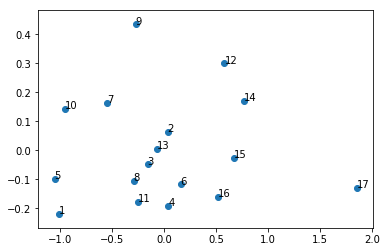

In [46]:
HORIZONTAL_OFFSET = 0
VERTICAL_OFFSET = 0

fig, ax = plt.subplots()
ax.scatter(principal_components[:, 0], principal_components[:, 1])
print(player_id_series)
for i in range(len(player_id_series)):
    print(i)
    ax.annotate(str(i + 1), (principal_components[i, 0] + HORIZONTAL_OFFSET, principal_components[i, 1] + VERTICAL_OFFSET))

In [47]:
training = player_data[['AcuteLoad','ChronicLoad','AcuteChronicRatio']]

[[  39.68829114   10.46591311]
 [  17.76275107  -30.2415998 ]
 [-166.36646944  -20.01355041]
 [  -3.68766108  -11.74909839]
 [ 254.05638451    9.04779358]
 [-162.3767548   -13.04051053]
 [ -43.02669878  -19.78922549]
 [ -32.90596229   32.68380486]
 [ -24.18387634   -5.77959407]
 [  12.93713772  -19.02013639]
 [-172.35862912   -4.74702565]
 [ 192.1772182    12.39313402]
 [-108.75169821   22.96018305]
 [  82.33278989  -59.34633488]
 [ 244.94028935   13.3420435 ]
 [ -51.43596236    3.86439322]
 [ -78.80114945   78.96981029]]
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
Name: PlayerID, dtype: int64
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


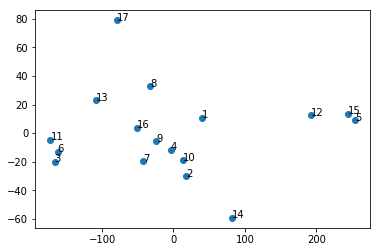

In [48]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(training)
print(principal_components)

HORIZONTAL_OFFSET = 0
VERTICAL_OFFSET = 0

fig, ax = plt.subplots()
ax.scatter(principal_components[:, 0], principal_components[:, 1])
print(player_id_series)
for i in range(len(player_id_series)):
    print(i)
    ax.annotate(str(i + 1), (principal_components[i, 0] + HORIZONTAL_OFFSET, principal_components[i, 1] + VERTICAL_OFFSET))

Unfortunately there is no special relationship between the clusters for prformance, training and wellness.